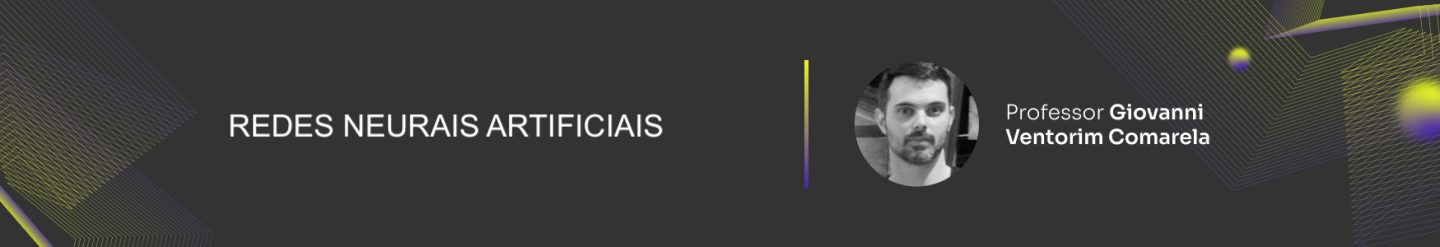

# MLP - Treinamento - Formalização do Problema

Na aula passada, estudamos os principais conceitos relacionados a uma MLP (*Multilayer Perceptron*). Vimos também que MLPs podem ser ferramentas úteis para tratar problemas de reconhecimento de padrões, mesmo em casos de problemas complexos e com características não lineares.

Para relembrar, a Figura abaixo apresenta os principais conceitos e quantidades estudados.

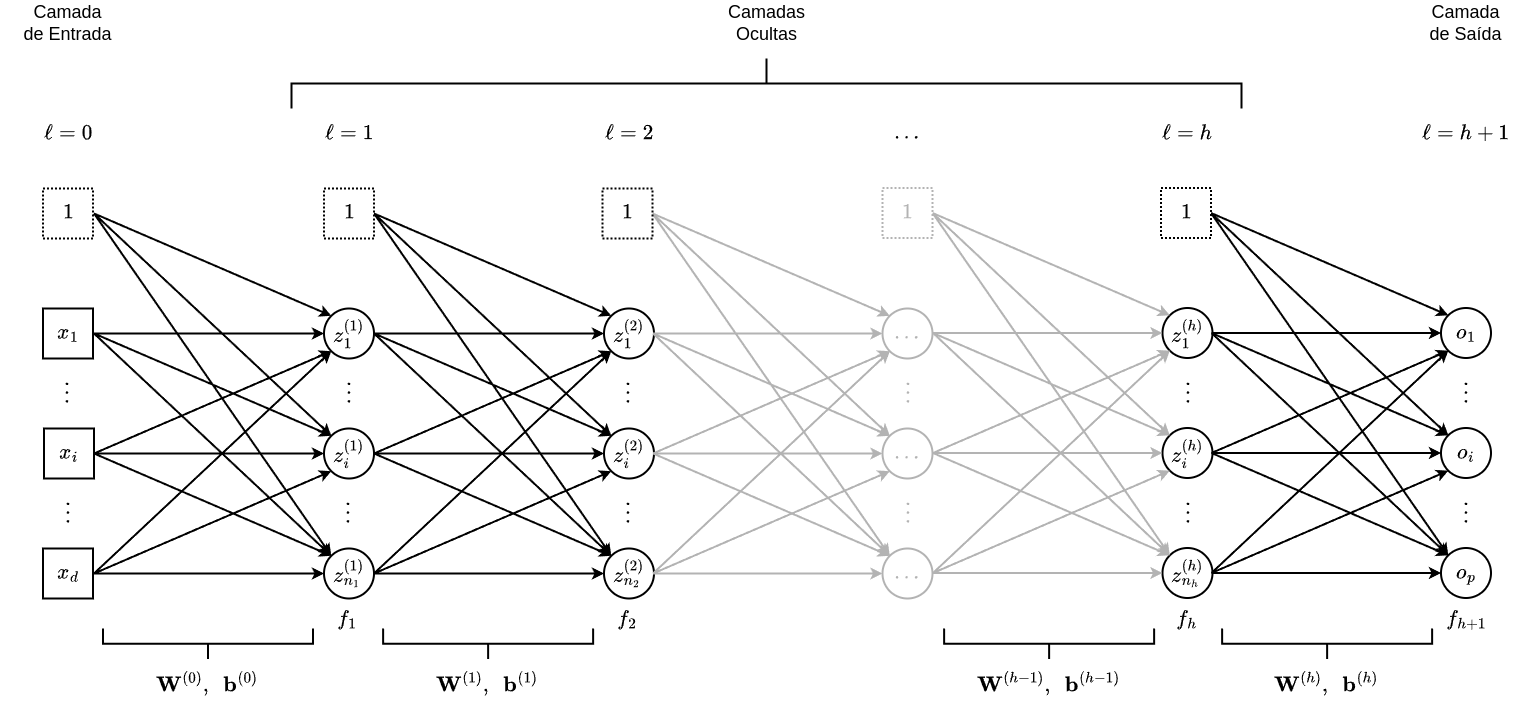

Apesar da utilidade da MLP, há ainda várias perguntas que não foram respondidas na aula passada e precisam ser abordadas. Entre elas:

1. Como escolher os parâmetros da MLP, i.e., as matrizes $\mathbf{W}^{(\ell)}$'s e os vetores $\mathbf{b}^{(\ell)}$'s?
2. Como definir o número de camadas ocultas?
3. Como definir o tamanho, i.e., número de unidades, de cada camada oculta?
4. Como definir as funções de ativação em cada camada oculta?
5. Como definir o tamanho da camada de saída?
6. Como definir a função de ativação da camada de saída?

A Pergunta (1) está relacionado ao processo de treinamento de uma Rede Neural. Essa pergunta **será o foco principal** da aula de hoje e das próximas aulas.

As Perguntas (2), (3) e (4) estão relacionadas à definição da **Arquitetura da Rede** e ao processo de escolha de hiperparâmetros. Geralmente, essas escolhas são feitas utilizando mecanismos de validação cruzada, assim como visto na disciplina de Classificação de Dados.

As Perguntas (5) e (6) têm mais relação com a tarefa de aprendizado supervisionado sendo abordada. Apesar de não ser o foco, também veremos nessa aula como abordar essas perguntas.

## Especificação da Tarefa

### Entrada

Vamos assumir que a tarefa de interesse da aula de hoje tem uma **entrada** composta de duas partes.

**Parte 1 -** um conjunto de treinamento $D = \{(\mathbf{x}_i, \mathbf{y}_i)\}_{i = 1}^n$ referente a um problema de aprendizado supervisionado. Ou seja, $D$ é um conjunto de pares ordenados, onde $\mathbf{x}_i\in\mathbb{R}^d$. Já a especificação de $\mathbf{y}_i$ pode variar dependendo do problema de aprendizado supervisionado de interesse. Tipicamente, temos as seguintes opções:

- $\mathbf{y}_i \in \mathbb{R}$ se for um problema de regressão simples;

- $\mathbf{y}_i \in \mathbb{R}^K$ se for um problema de regressão multivariada;

- $\mathbf{y}_i \in \{0, 1\}$, se for um problema de classificação binária; e

- $\mathbf{y}_i \in \{0, 1, \dots, C-1\}$, se for um problema de classificação multiclasse.

**Parte 2 -** a especificação da arquitetura de uma MLP para a tarefa de aprendizado supervisionado de interesse. Ou seja, vamos assumir que o número de camadas, o número de unidades nas camadas e todas as funções de ativação já foram definidos e são conhecidos.



### Pergunta

Assim, dados o conjunto de treinamento, a arquitetura da MLP e a tarefa de aprendizado supervisionado de interesse, como escolher as **melhores** matrizes de peso ($\mathbf{W}^{(\ell)}$'s) e os **melhores** vetores vieses ($\mathbf{b}^{(\ell)}$'s) para a rede?

Antes de respondermos a essa pergunta, precisamos de fazer algumas definições e formalizar alguns conceitos para entender o que "**melhores**" significa nesse contexto.

## Definições

Vamos chamar de $\mathcal{W}$ o conjunto de todas as matrizes de pesos da MLP, ou seja, $\mathcal{W} = \{\mathbf{W}^{(0)}, \dots, \mathbf{W}^{(h)}\}$.

Analogamente, vamos chamar de $\mathcal{B}$ o conjunto de todos os vetores de vieses da MLP, ou seja, $\mathcal{B} = \{\mathbf{b}^{(0)}, \dots, \mathbf{b}^{(h)}\}$.

De início, $\mathcal{W}$ e $\mathcal{B}$ são objetos desconhecidos e são os objetos que queremos encontrar.

Considere ainda $\phi(\mathbf{x}; \mathcal{W}, \mathcal{B})$ a saída da rede para a entrada $\mathbf{x}$ quando $\mathcal{W}$ e $\mathcal{B}$ são conhecidos e definem os pesos e vieses da rede, respectivamente.

**Importante:** se $\mathcal{W}$ e $\mathcal{B}$ forem escolhidos de forma correta, temos que:
1. $\phi(\mathbf{x}; \mathcal{W}, \mathcal{B})$ deve estar "próximo" de $\mathbf{y}$ para todo $(\mathbf{x}, \mathbf{y}) \in D$; e
2. Como já discutido em disciplinas anteriores, $\phi$ também deve ser capaz de generalizar para dados não vistos no treinamento.

Assim, uma outra pergunta que surge de forma natural é: como medir a distância entre $\phi(\mathbf{x}; \mathcal{W}, \mathcal{B})$ e $\mathbf{y}$?
Essa pergunta está relacionada a um conceito fundamental em Aprendizado de Máquina e Redes Neurais Artificiais, o conceito de **Função de Perda** (ou, do inglês, *Loss Function*).

### Funções de Perda

Em aprendizado de máquina, dado um vetor/valor de entrada, uma Função de Perda (do ingles *Loss Function*) quantifica a diferença entre a saída de um modelo e o valor real associado à entrada.

Há várias funções de perda na literatura. A escolha geralmente depende do tipo da aplicação e de características do conjunto de dados.

Para simplificar a notação, assumiremos que, dada uma entrada $\mathbf{x}$:
- $\mathbf{y}$ representa o valor real associado à entrada; e
- $\hat{\mathbf{y}} = \phi(\mathbf{x}; \mathcal{W}, \mathcal{B})$ representa a saída da MLP (modelo) para a entrada $\mathbf{x}$, quando a MLP é parametrizada por $\mathcal{W}$ e $\mathcal{B}$.

Denotaremos a função de perda para comparar $\mathbf{y}$ e $\hat{\mathbf{y}}$ por ${L}(\mathbf{y}, \hat{\mathbf{y}})$.

 A seguir, veremos exemplos para usos típicos de MLPs em diferentes tarefas de aprendizado supervisionado.

#### Regressão simples

Ao se utilizar uma MLP para cenários de Regressão Simples, é comum escolher uma arquitetura cuja **camada de saída tenha apenas uma unidade** e que nessa unidade faça-se uso da função de ativação **identidade**. Nesse caso, $\mathbf{y}$ e $\hat{\mathbf{y}}$ são números reais.

Apesar de outras escolhas de função de ativação serem possíveis, dependendo do domínio do problema, em geral, faz-se uso do **Erro Quadrático** para construir uma função de perda. Ou seja:

$${L}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{2}(\mathbf{y} - \hat{\mathbf{y}})^2.$$

A Figura abaixo apresenta o comportamento dessa função de perda para $\mathbf{y}$ e $\hat{\mathbf{y}}$ pertencentes ao intervalo $[0, 1]$. Pode-se perceber que quando  os dois   são próximos, a função de perda é próxima de zero. Essa situação, indica um "acerto" do modelo. À medida que $\mathbf{y}$ e $\hat{\mathbf{y}}$ se distanciam, a função de perda cresce, indicando um "erro" do modelo.

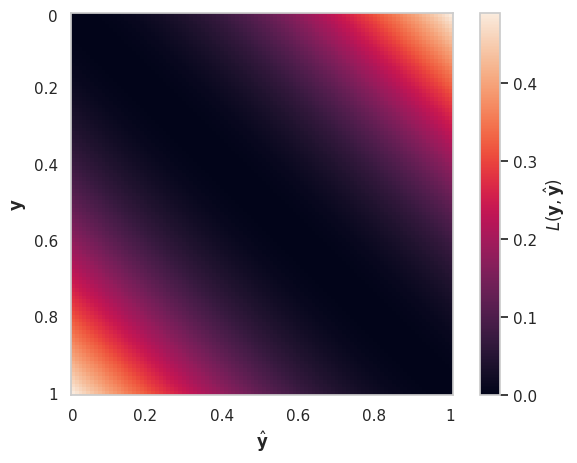

In [ ]:
#@title
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

n = 100

x = np.zeros((n, n))
v = np.arange(0, 1, 1 / n)

for i, j in product(range(n), range(n)):
  x[i][j] = 0.5 * (v[i] - v[j]) ** 2
  #print(i, j)

hm = plt.imshow(x);
ticks = [str(a) for a in [0, 0.2, 0.4, 0.6, 0.8, 1]]

plt.xticks([0, 19, 39, 59, 79, 99], ticks);
plt.yticks([0, 19, 39, 59, 79, 99], ticks);
cb = plt.colorbar(hm);
cb.set_label(r'${L}(\mathbf{y}, \hat{\mathbf{y}})$')
plt.xlabel(r'$\hat{\mathbf{y}}$')
plt.ylabel(r'$\mathbf{y}$')
plt.tight_layout();




#### Regressão multivariada

Generalizando, ao se utilizar uma MLP para cenários de Regressão Multivariada, é comum escolher uma arquitetura cuja **camada de saída tenha o número de unidades igual à dimensão dos $\mathbf{y}$'s** do conjunto de treinamento e que nessas unidades faça-se uso da função de ativação **identidade**. Nesse caso, $\mathbf{y}$ e $\hat{\mathbf{y}}$ pertencem ao $\mathbb{R}^K$.

Apesar de outras escolhas de função de ativação serem possíveis, dependendo do domínio do problema, em geral, aqui também faz-se uso do **Erro Quadrático** como função de perda. Ou seja:

$${L}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{2}\Vert \mathbf{y} - \hat{\mathbf{y}}\Vert^2 = \frac{1}{2}\sum_{j=1}^K(y_j - \hat{y}_j)^2,$$
onde $\Vert\cdot\Vert$ denota a norma $\ell_2$ de um vetor e $K$, como já mencionado anteriormente, é o número de unidades da camada de saída da MLP (que também é a dimensionalidade dos $\mathbf{y}$'s do conjunto de treinamento).

#### Classificação binária

Ao se utilizar uma MLP para cenários de Classificação Binária, é comum escolher uma arquitetura cuja **camada de saída tenha apenas uma unidade** e que nessa unidade faça-se uso da função de ativação *Sigmoid*. Lembre, aqui $\mathbf{y}$ pode assumir valor 0 ou 1 e $\hat{\mathbf{y}}$ é um número real entre 0 e 1, o qual representa a chance (ou probabilidade) da entrada $\mathbf{x}$ pertencer à classe 1.

Nesse caso, é comum utilizar uma função de perda chamada **entropia cruzada binária** (ou BCE, do inglês, *Binary Cross-Entropy*):

$${L}(\mathbf{y}, \hat{\mathbf{y}}) = -[\mathbf{y}\log(\hat{\mathbf{y}}) + (1-\mathbf{y})\log(1-\hat{\mathbf{y}})].$$

A Figura abaixo apresenta o comportamento da BCE. Pode-se perceber que quando $\mathbf{y}$ e $\hat{\mathbf{y}}$ são próximos, a função de perda é próxima de zero. Essa situação, indica um "acerto" do modelo.
No entanto, quando $\hat{\mathbf{y}}$ tende a $1 - \mathbf{y}$, a BCE tende ao infinito, indicando um "erro" do modelo.

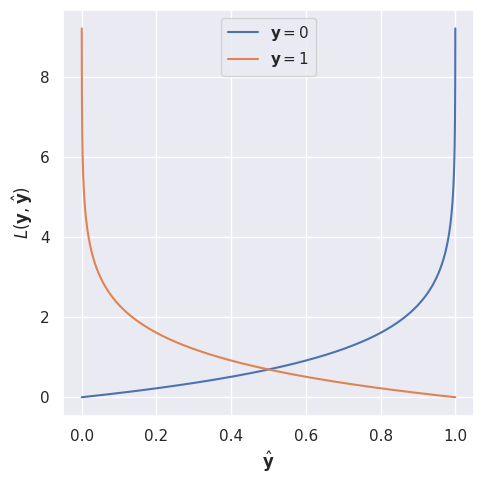

In [ ]:
#@title BCE - Gráfico
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
sns.set()


def bce(y, y_hat):
    return -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)

x = np.arange(0.0001, 1, 0.0001)
y0 = [bce(0, a) for a in x]
y1 = [bce(1, a) for a in x]

fig = plt.figure(figsize = (5, 5));
plt.plot(x, y0, label=r'$\mathbf{y} = 0$')
plt.plot(x, y1, label=r'$\mathbf{y} = 1$')
plt.legend(loc = 'best')
plt.xlabel(r'$\hat{\mathbf{y}}$')
plt.ylabel(r'${L}(\mathbf{y}, \hat{\mathbf{y}})$');
plt.tight_layout();

#### Classificação multiclasse

Ao se utilizar uma MLP para cenários de Classificação Multiclasse, é comum escolher uma arquitetura cuja **camada de saída tenha o número de unidades igual ao número de classes do problema** e que nessas unidades faça-se uso da função de ativação *softmax*. Lembre, nesse contexto $\mathbf{y}$ pode assumir valores em $\{0, 1, \dots, C-1\}$ e $\hat{\mathbf{y}}$ pertence ao $(0, 1)^C$. Mais especificamente, a $j$-ésima componente de $\hat{\mathbf{y}}$ (denotada por $\hat{y}_j$) representa a chance (ou probabilidade) da entrada $\mathbf{x}$ pertencer à classe $j$.

Apesar de $\mathbf{y}$ ser um inteiro em $\{0, 1, \dots, C-1\}$, em classificação multiclasse é comum/conveniente representar os rótulos dos elementos fazendo uso da codificação *one-hot*. Ou seja, nesse tipo de problema, ao invés de utilizar $\mathbf{y}$ para representar as classes dos elementos, utilizaremos $\mathbf{y}' \in \{0, 1\}^C$, o qual tem componentes definidas por:
$$
y'_j =
\begin{cases}
1\text{, se } \mathbf{y} = j\\
0\text{, caso contrário}.
\end{cases}
$$

**Observação:** já vimos o uso dessa codificação na aula passada, quando fizemos um exemplo na biblioteca `Keras`. No entanto, para relembrar, segue um exemplo.

Suponha que $C = 10$ (i.e., 10 classes) e que tenhamos um objeto $\mathbf{x}$ pertencente à Classe 7. Assim, temos que:
- $\mathbf{y} = 7$; e
- $\mathbf{y}' = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]^T$.
Ou seja, $\mathbf{y}'$ é 1 na posição 7 (a classe do objeto) e 0 nas demais posições.

Com essa representação, podemos definir a **entropia cruzada** (do inglês *cross-entropy*) para uso como função de perda em problemas de classificação multiclasse:

$${L}(\mathbf{y}, \hat{\mathbf{y}}) = -\sum_{j = 1}^Cy'_j\log(\hat{y}_j).$$

Veja que a definição acima é uma generalização da função de perda apresentada para problemas de classificação binária. De fato, se tomarmos $C=2$ na fórmula acima, temos a fórmula da entropia cruzada binária.

## Formalização da tarefa de treinamento

Com o conceito de função de perda bem estabelecido, podemos formalizar a tarefa de treinamento de uma MLP. Dados um conjunto de treinamento $D = \{(\mathbf{x}_i, \mathbf{y}_i)\}_{i = 1}^n$ e a definição da arquitetura da rede, a tarefa consiste em achar os pesos ($\mathcal{W}$) e os vieses ($\mathcal{B}$) que minimizem a soma das perdas computada sobre todos os elementos do conjunto de treinamento $D$. Em outras palavras, queremos resolver o problema de otimização dado por:

$$\underset{\mathcal{W}, \mathcal{B}}{\operatorname{arg min}}\sum_{i = 1}^n{L}(\mathbf{y}_i, \phi(\mathbf{x}_i; \mathcal{W}, \mathcal{B})).$$


Resolver o problema de otimização posto acima é uma tarefa desafiadora. Principalmente quando o número de camadas ocultas da MLP, o número de unidades nas camadas ocultas e o tamanho do conjunto de dados são grandes. Nas próximas aulas, veremos como esse problema pode ser abordado de maneira eficiente.


## Referências

- Machine Learning, Tom Mitchell, McGraw Hill, 1997.

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020.